In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import graphviz
from graphviz import Graph

import env
import wrangle_zillow
import Ainslie_wrangle_zillow
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# change display settings to show all columns
pd.set_option("display.max_columns", None)

In [3]:
# use a function to pull in zillow data
df = wrangle_zillow.wrangle_zillow()
df.shape

(50782, 24)

In [4]:
# use a function to split data for exploring and modeling
train, validate, test = wrangle_zillow.split_data(df)
train.head(3)

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio
12794,2.00,4,1352,los_angeles,34273883,-118492869,6925,12447.00,3101,96370,0.00,1955.00,148000,505000,2016,357000,6228,0.03,2017-02-27,1,0,0,62,0.50
76021,3.00,4,1980,los_angeles,34362339,-117653901,8763,21395.00,3101,97324,0.00,1981.00,243342,303236,2016,59894,3275,0.15,2017-09-13,1,0,0,36,0.75
16536,3.00,3,1484,los_angeles,34288283,-118376120,12470,12447.00,3101,96368,0.00,1990.00,177997,311590,2016,133593,3881,-0.03,2017-03-13,1,0,0,27,1.00


In [8]:
train.head()

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio
12794,2.00,4,1352,los_angeles,34273883,-118492869,6925,12447.00,3101,96370,0.00,1955.00,148000,505000,2016,357000,6228,0.03,2017-02-27,1,0,0,62,0.50
76021,3.00,4,1980,los_angeles,34362339,-117653901,8763,21395.00,3101,97324,0.00,1981.00,243342,303236,2016,59894,3275,0.15,2017-09-13,1,0,0,36,0.75
16536,3.00,3,1484,los_angeles,34288283,-118376120,12470,12447.00,3101,96368,0.00,1990.00,177997,311590,2016,133593,3881,-0.03,2017-03-13,1,0,0,27,1.00
114,2.00,3,1731,orange,33883151,-117869121,8000,26531.00,1286,97068,7.00,1963.00,52482,73745,2016,21263,1353,0.02,2017-01-03,0,1,0,54,0.67
48044,1.00,3,1011,los_angeles,33921848,-118247414,5970,118994.00,3101,96040,0.00,1946.00,43615,136298,2016,92683,2101,0.02,2017-06-20,1,0,0,71,0.33


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28437 entries, 12794 to 43905
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          28437 non-null  float64
 1   bedrooms           28437 non-null  int64  
 2   area               28437 non-null  int64  
 3   counties           28437 non-null  object 
 4   latitude           28437 non-null  int64  
 5   longitude          28437 non-null  int64  
 6   lot_area           28437 non-null  int64  
 7   regionidcity       28437 non-null  float64
 8   regionidcounty     28437 non-null  object 
 9   regionidzip        28437 non-null  object 
 10  roomcnt            28437 non-null  float64
 11  yearbuilt          28437 non-null  float64
 12  structuretaxvalue  28437 non-null  int64  
 13  taxvalue           28437 non-null  int64  
 14  assessmentyear     28437 non-null  object 
 15  landtaxvalue       28437 non-null  int64  
 16  taxamount         

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,28437.00,2.25,0.93,1.00,2.00,2.00,3.00,10.00
bedrooms,28437.00,3.28,0.92,1.00,3.00,3.00,4.00,11.00
area,28437.00,1857.23,852.84,152.00,1260.00,1639.00,2243.00,10686.00
latitude,28437.00,34024832.17,275212.67,33340620.00,33826576.00,34021597.00,34191116.00,34818767.00
longitude,28437.00,-118191297.62,357901.21,-119447944.00,-118394397.00,-118147156.00,-117928314.00,-117554636.00
lot_area,28437.00,11417.18,105468.85,480.00,5558.00,6763.00,8568.00,6971010.00
regionidcity,28437.00,33382.90,49436.24,3491.00,12447.00,24812.00,40227.00,396556.00
roomcnt,28437.00,1.92,3.14,0.00,0.00,0.00,5.00,14.00
yearbuilt,28437.00,1963.24,22.91,1878.00,1950.00,1961.00,1979.00,2015.00
structuretaxvalue,28437.00,171990.86,149790.60,148.00,75771.00,128632.00,214968.00,1646927.00


<AxesSubplot:>

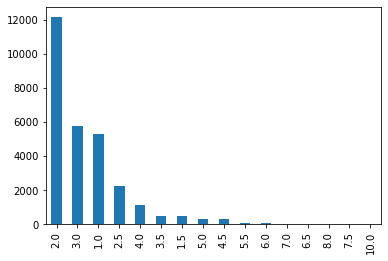

In [11]:
# check bathroom value counts
train.bathrooms.value_counts().plot.bar()

<AxesSubplot:>

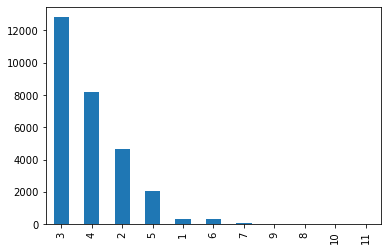

In [12]:
# check bedroom value counts
train.bedrooms.value_counts().plot.bar()

<AxesSubplot:>

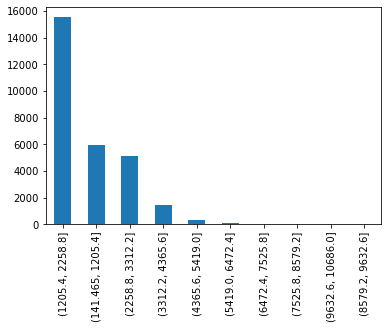

In [13]:
# check binned area value counts
train.area.value_counts(bins=10).plot.bar()

<AxesSubplot:>

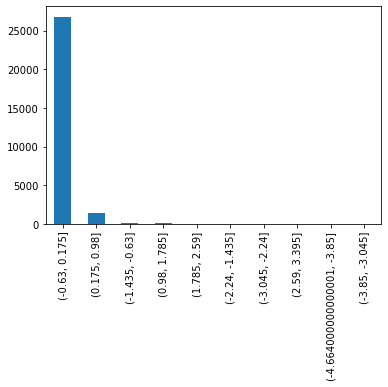

In [14]:
# check binned logerror value counts
train.logerror.value_counts(bins=10).plot.bar()

<AxesSubplot:>

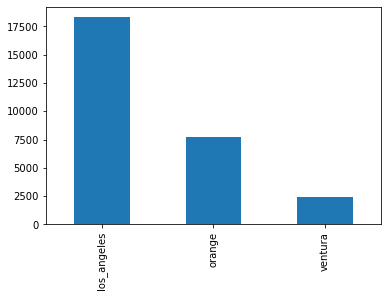

In [15]:
# check binned logerror value counts
train.counties.value_counts().plot.bar()

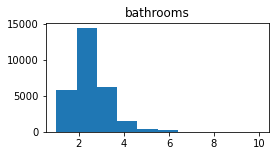

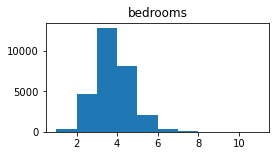

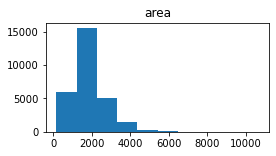

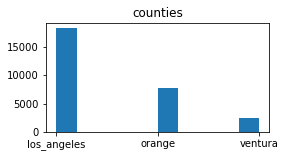

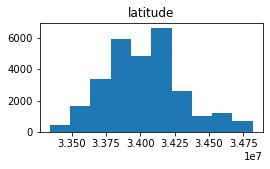

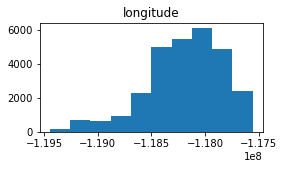

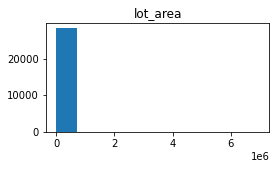

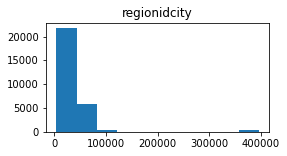

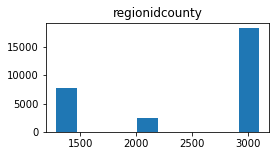

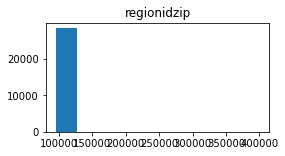

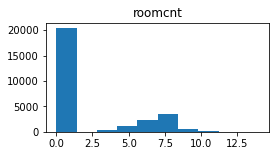

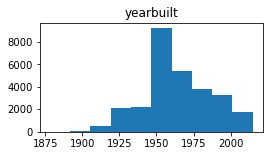

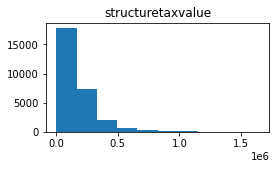

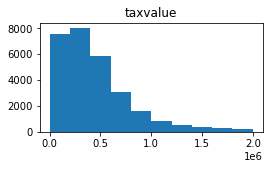

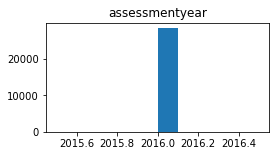

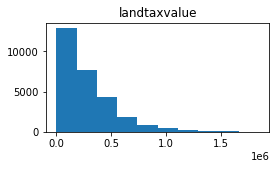

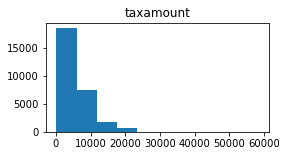

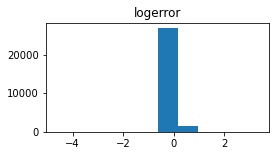

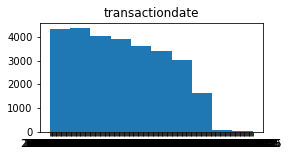

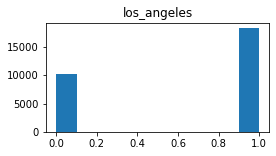

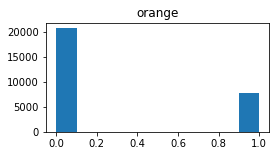

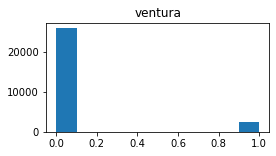

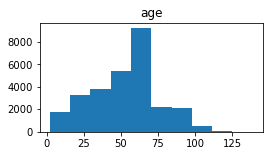

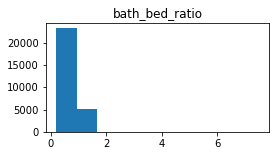

In [18]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

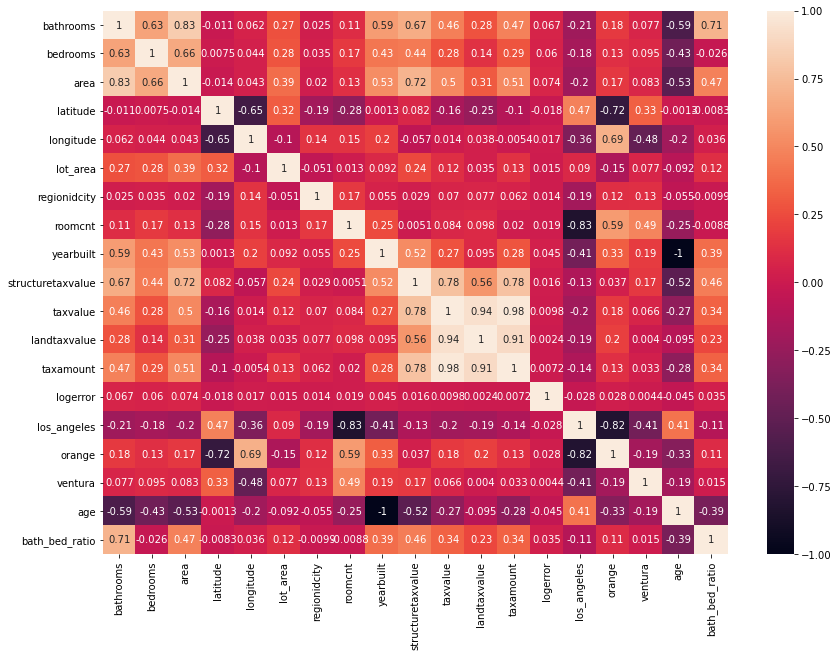

In [22]:
# use a heatmap to see if there are any obvious correlations
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(method='spearman'), annot=True)

### Many of the features seem to be skewed to the right

### Bathrooms, bedrooms, area, and age have the highest correlation with logerror

### There are almost twice as many properties in LA County than Orange & Ventura county

## Is there a difference in mean logerror for each of the counties?

In [25]:
train.head(3)

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio
12794,2.00,4,1352,los_angeles,34273883,-118492869,6925,12447.00,3101,96370,0.00,1955.00,148000,505000,2016,357000,6228,0.03,2017-02-27,1,0,0,62,0.50
76021,3.00,4,1980,los_angeles,34362339,-117653901,8763,21395.00,3101,97324,0.00,1981.00,243342,303236,2016,59894,3275,0.15,2017-09-13,1,0,0,36,0.75
16536,3.00,3,1484,los_angeles,34288283,-118376120,12470,12447.00,3101,96368,0.00,1990.00,177997,311590,2016,133593,3881,-0.03,2017-03-13,1,0,0,27,1.00


In [54]:
# check mean logerror for each county
train.groupby('counties').logerror.mean()

counties
los_angeles   0.02
orange        0.02
ventura       0.02
Name: logerror, dtype: float64

In [58]:
# code is not producing the same result as groupby likely due to rounding
train[train.counties == 'los_angeles'].logerror.mean()

0.015888107084402518

In [77]:
# code is not producing the same result as groupby likely due to rounding
train[train.counties == 'orange'].logerror.mean()

0.02310369821347422

In [78]:
# code is not producing the same result as groupby likely due to rounding
train[train.counties == 'ventura'].logerror.mean()

0.016804598418300867

**My project partner explored this in greater depth with statistical testing and determined there was a significant difference in logerror by county**

In [29]:
# Use .describe with object columns.
obj_cols = train.columns[[train[col].dtype == 'O' for col in train.columns]]
for col in obj_cols:
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

los_angeles    18299
orange          7707
ventura         2431
Name: counties, dtype: int64
los_angeles   0.64
orange        0.27
ventura       0.09
Name: counties, dtype: float64
----------------------
3101    18299
1286     7707
2061     2431
Name: regionidcounty, dtype: int64
3101   0.64
1286   0.27
2061   0.09
Name: regionidcounty, dtype: float64
----------------------
97319    435
97318    370
97328    298
97329    295
97118    284
        ... 
96434      2
95996      1
96467      1
96038      1
96323      1
Name: regionidzip, Length: 376, dtype: int64
97319   0.02
97318   0.01
97328   0.01
97329   0.01
97118   0.01
        ... 
96434   0.00
95996   0.00
96467   0.00
96038   0.00
96323   0.00
Name: regionidzip, Length: 376, dtype: float64
----------------------
2016    28437
Name: assessmentyear, dtype: int64
2016   1.00
Name: assessmentyear, dtype: float64
----------------------
2017-06-30    440
2017-04-28    335
2017-07-28    301
2017-08-31    301
2017-05-31    296
            

## What does absolute logerror look like from county to county?

In [106]:
# check the range for logerror
train.logerror.describe()

count   28437.00
mean        0.02
std         0.18
min        -4.66
25%        -0.02
50%         0.01
75%         0.04
max         3.39
Name: logerror, dtype: float64

In [115]:
# add a column that bins each value of logerror into max, min, or med absolute error
train['log_e'] = pd.cut(train.logerror, bins=[-5,-1,-.03,.03,1,5], ordered=False, labels=['max','med','min','med','max'])
train.head()

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio,log_e
12794,2.00,4,1352,los_angeles,34273883,-118492869,6925,12447.00,3101,96370,0.00,1955.00,148000,505000,2016,357000,6228,0.03,2017-02-27,1,0,0,62,0.50,min
76021,3.00,4,1980,los_angeles,34362339,-117653901,8763,21395.00,3101,97324,0.00,1981.00,243342,303236,2016,59894,3275,0.15,2017-09-13,1,0,0,36,0.75,med
16536,3.00,3,1484,los_angeles,34288283,-118376120,12470,12447.00,3101,96368,0.00,1990.00,177997,311590,2016,133593,3881,-0.03,2017-03-13,1,0,0,27,1.00,med
114,2.00,3,1731,orange,33883151,-117869121,8000,26531.00,1286,97068,7.00,1963.00,52482,73745,2016,21263,1353,0.02,2017-01-03,0,1,0,54,0.67,min
48044,1.00,3,1011,los_angeles,33921848,-118247414,5970,118994.00,3101,96040,0.00,1946.00,43615,136298,2016,92683,2101,0.02,2017-06-20,1,0,0,71,0.33,min


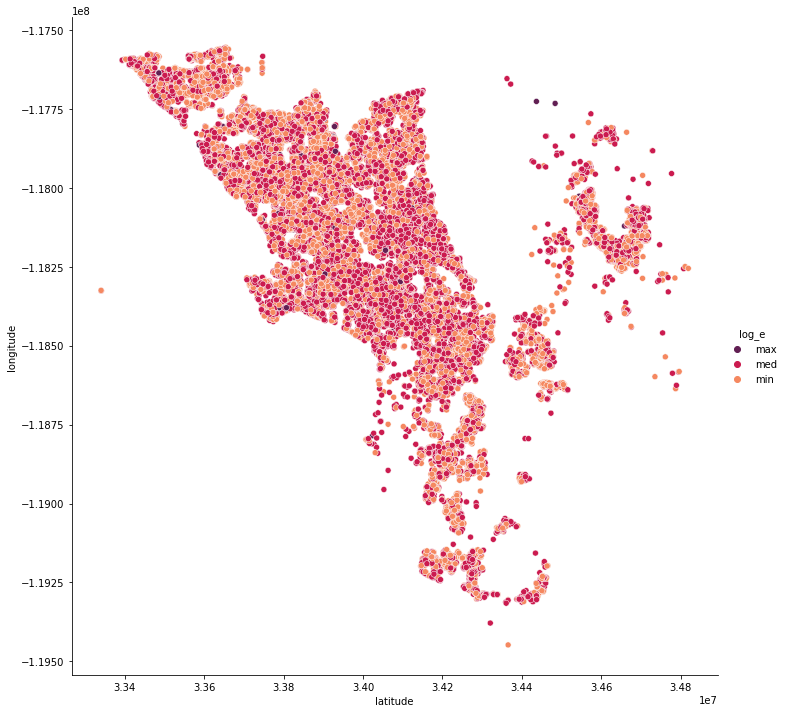

In [116]:
# plot the data to see which areas have the most logerror
sns.relplot(data=train, x='latitude', y='longitude', hue='log_e', hue_order=['max', 'med','min'], height=10, palette='rocket')

### As seen towards the center of the graph, Los Angeles County does have a higher proportion of med - max logerror which could mean the model has a harder time predicting home values from this location or could just be due to the larger number of properties sold in this area

In [117]:
# use crosstab to visualize the number of each category per county
pd.crosstab(train.counties, train.log_e)

log_e,max,med,min
counties,,,
los_angeles,70,10204,8025
orange,60,3522,4125
ventura,9,1118,1304


<AxesSubplot:xlabel='counties', ylabel='proportion'>

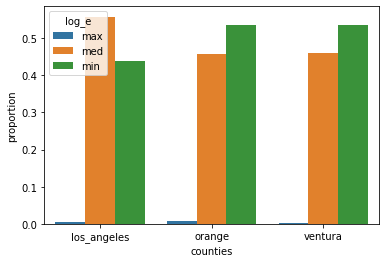

In [118]:
# plot the data to see if any county has a higher percentage of max logerrors
x, y, hue = 'counties', 'proportion', 'log_e'
hue_order = ['max', 'med', 'min']

(train[hue]
 .groupby(train[x])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

### We can barely see on the graph but it looks like the model produces a slightly higher percentage of max errors for Orange County but a higher percentage of medium error for Los Angeles County

In [124]:
# drop log_e to prep for clustering
train = train.drop(columns='log_e')
train.head()

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio
12794,2.00,4,1352,los_angeles,34273883,-118492869,6925,12447.00,3101,96370,0.00,1955.00,148000,505000,2016,357000,6228,0.03,2017-02-27,1,0,0,62,0.50
76021,3.00,4,1980,los_angeles,34362339,-117653901,8763,21395.00,3101,97324,0.00,1981.00,243342,303236,2016,59894,3275,0.15,2017-09-13,1,0,0,36,0.75
16536,3.00,3,1484,los_angeles,34288283,-118376120,12470,12447.00,3101,96368,0.00,1990.00,177997,311590,2016,133593,3881,-0.03,2017-03-13,1,0,0,27,1.00
114,2.00,3,1731,orange,33883151,-117869121,8000,26531.00,1286,97068,7.00,1963.00,52482,73745,2016,21263,1353,0.02,2017-01-03,0,1,0,54,0.67
48044,1.00,3,1011,los_angeles,33921848,-118247414,5970,118994.00,3101,96040,0.00,1946.00,43615,136298,2016,92683,2101,0.02,2017-06-20,1,0,0,71,0.33


In [59]:
# train_scaled, validate_scaled, test_scaled = Ainslie_wrangle_zillow.scale_data_min_maxscaler(train, validate, test)
# train_scaled.head()